<center><h3>A study of Employment Change in Singapore, 2002 - 2017</h3></center>

## Introduction / Problem Statement

This report aims to find out the trends in the the employment change in Singapore. Employment Change counts the total number of people who lost their jobs or gained employment in the previous year.  In particular, this study answers a few questions:
- Over the years, which sector holds the highest job employment rate?
- Which sector has the largest growth?
- There are rumors that there are a lot of IT jobs in the market but is that true?

From this study, we hope to have a better understanding about the job market in Singapore and the areas where there is higher demand for applicants as it could be useful knowledge when applying for jobs.

The study will include observations for 15 years, from 2003 to 2017. 

 ## Dataset

The dataset used is from [data.gov.sg](https://data.gov.sg/dataset/employment-change-by-industry-annual), in a csv format. The titles of the dataset are **[employment-change-by-industry-level3]**. This dataset comprises the employment change for the 4 different sectors in Singapore (Construction, Manufacturing, Services, Others) from 1991 to 2017.

## Methodology

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
DIMS = (16, 6)

In [31]:
#Data cleaning for employment change csv. The "others" sector was taken out due to the fact that it only holds a very minute percentage 
#of the employment change over the years and the csv does not specify the exact nature of the jobs in the "others" sector. Further more
#there are several years that do not have data for the "others" sector so it would be difficult to derive any conclusion for this sector
#if we were to include it.

df = pd.read_csv('employment-change-by-industry-level3.csv')

df = df[['year', 'industry1', 'industry2', 'employment_change']]
df.columns = ['Year', 'Sector', 'Industry', 'Employment Change']
df = df[df['Sector'] != 'others']
# df['Employment Change'] = df['Employment Change'].str.replace('-', '- ')
df['Employment Change'] = df['Employment Change'].apply(pd.to_numeric, errors='coerce')
df = df[(df['Year'] > 2002) & (df['Year'] < 2018)]
df['Year'].astype(int)
df.sample(20)

# df[df['industry2'] == 'information and communications' ]

,Year,Sector,Industry,Employment Change
517,2010,manufacturing,"petroleum, chemical and pharmaceutical products",-3.7
622,2013,services,wholesale and retail trade,4.9
389,2006,manufacturing,transport equipment,21.8
359,2005,services,transport and storage,1.4
649,2014,manufacturing,"petroleum, chemical and pharmaceutical products",-3.6
755,2017,services,transportation and storage,1.9
392,2006,services,wholesale and retail trade,3.3
711,2016,construction,construction,-11.6
688,2015,services,wholesale and retail trade,-7.7
729,2016,services,financial and insurance services,5.2


In [32]:
# Clean the data and organise it nicely into a  pivot table  with 3 headers(each representing a sector) so we can plot the graph.
sector_pt = pd.pivot_table(df, index=['Year'], columns=['Sector'], values='Employment Change', aggfunc=np.sum)
sector_df = sector_pt.reset_index()
sector_df.columns = ['year', 'construction', 'manufacturing', 'services']


sector_df

,year,construction,manufacturing,services
0,2003,-17.5,-4.9,12.1
1,2004,-9.1,27.1,56.6
2,2005,8.7,29.0,81.2
3,2006,20.5,41.7,120.8
4,2007,40.4,49.4,164.4
5,2008,64.0,19.4,161.2
6,2009,24.0,-43.8,90.2
7,2010,3.4,-0.7,146.6
8,2011,22.0,3.6,120.1
9,2012,39.2,10.9,97.4


### Methodology - Line Plots
Line plots were drawn for the 3 sectors, Construction, Services and Manufacturing. Over the years,the Construction and Manufacturing sector has shown signs of a downward trend. The Service Sector on the other hand, has shown tremendous growth, only slowing down in recent years. It has to be noted that despite this, the service sector still has the highest employment change of the three sectors. In fact, since 2014, both the construction and manufacturing sector have shrunk with more people losing their jobs than finding employment. 

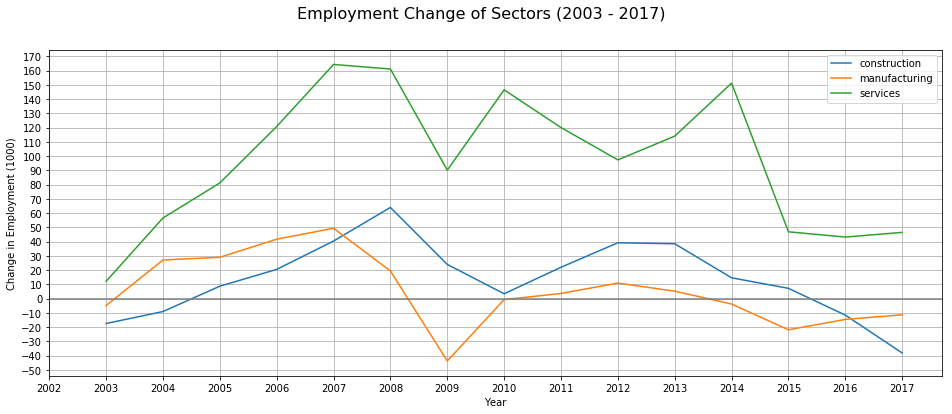

In [33]:
#Always start by creating a figure and adding (empty) subplots.
fig = plt.figure(figsize=(16,6))
# The first number is the no. of rows. 
# The second number is the no. of columns.
# The third number is the plot number. Count up by row, then by column.
ax1 = fig.add_subplot(111)

#Set the title of the subplot
fig.suptitle("Employment Change of Sectors (2003 - 2017)", fontsize=16)

#Plot from the df
sector_df.plot(kind='line', x='year', y='construction', ax=ax1)
sector_df.plot(kind='line', x='year', y='manufacturing', ax=ax1)
sector_df.plot(kind='line', x='year', y='services', ax=ax1, grid=True)

#Configure the ticks and labels of the x-axis...
plt.xticks(np.arange(2002, 2018))
plt.xlabel("Year")

#...and y-axis
plt.yticks(np.arange(-50, 180, 10))
plt.ylabel("Change in Employment (1000)")
plt.legend()
plt.axhline(y=0, color="grey")
#Add the legend
# ax1.legend(["No. of Tourist Arrivals (Millions)"], fontsize=12)
# legend([b,c,d,e], ["b","c","d","e"], loc=1
#Finally, show the plot
plt.show()

In [19]:
#After identifying the most promising sector, we want to delve into which industry within the sector holds the highest chance for people to find jobs.
#To do that, we created a dataframe that only has the services sector.
# df['Industry'].unique()
df2 = df[df['Sector'] == 'services']
df2
# df2['Industry']

,Year,Sector,Industry,Employment Change
289,2003,services,wholesale and retail trade,-1.9
290,2003,services,wholesale and retail trade,-0.3
291,2003,services,transport and storage,-1.9
292,2003,services,transport and storage,0.7
293,2003,services,transport and storage,-1.2
294,2003,services,transport and storage,1.7
295,2003,services,hotels and restaurants,-1.1
296,2003,services,hotels and restaurants,3.0
297,2003,services,information and communications,-1.5
298,2003,services,information and communications,-0.5


In [20]:
#Here, we commence data cleaning once more as the data provided is messy, with categories suddenly disappearing or merging with 
#other relevant job sectors. Hence, we identified the key sectors and organised them neatly into a pivot table, from which we can
#plot out our graph.

df3 = df2.copy()

def categorize(t):
    category = t.lower()
    if "wholesale" in category:
        return "wholesale & retail"
    elif "storage" in category:
        return "transportation & storage"
    elif ("accommodation" in category or "hotels" in category):
        return "hotels & restaurants"
    elif "information" in category:
        return "infocomm"
    elif "financial" in category:
        return "finance & insurance"
    elif "estate" in category:
        return "real estate & leasing"
    elif "professional" in category:
        return "professional"
    elif "social" in category:
        return "community, social & personal"
    elif "administrative" in category:
        return "admin & support"
df3 = df3.drop('Industry', axis=1)
        
df3['Industry'] = df2['Industry'].apply(categorize)
df3 = df3.drop('Sector', axis=1)
df4 = df3.copy()
df4['Employment Change'].fillna(0, inplace=True)

# df4.sample(50)

services_pt = pd.pivot_table(df4, index=['Year'], columns=['Industry'], values='Employment Change', aggfunc=np.sum)
services_df = services_pt.reset_index()
# services_df.columns = ['year', 'construction', 'manufacturing', 'services']

services_df.fillna(0, inplace=True)
#services_df.sample()

Industry,Year,admin & support,"community, social & personal",finance & insurance,hotels & restaurants,infocomm,professional,real estate & leasing,transportation & storage,wholesale & retail
11,2014,13.7,64.6,9.3,10.0,8.1,13.7,7.3,7.9,16.7


### Methodology - Stacked BarCharts
Stacked Barcharts are then plotted from the pivot table. This allows us to see clearly which industry within the service sector has the highest positve employment change. We can see that there is a general increase in employment change, though it has slowed down in recent years. This corresponds to the line graph that we have seen before this.

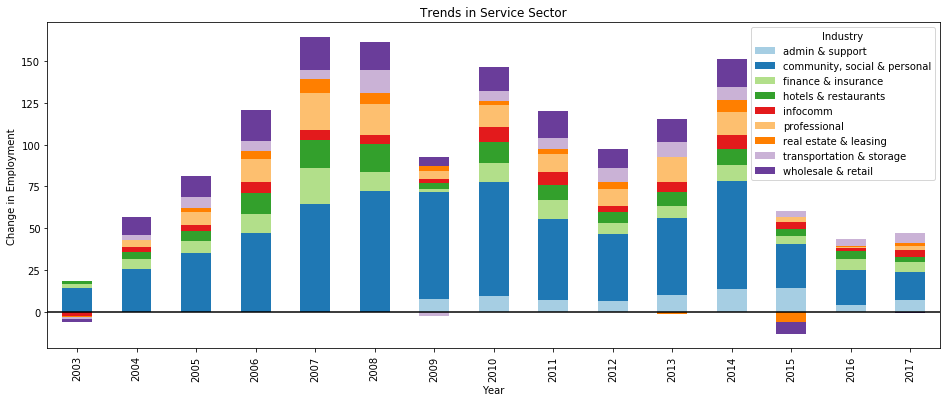

In [21]:
#Here, we plot out a stacked bar chart, so that we are able to see the trend and disparities 
#between the sectors through the years. Through this graph, we are able to see that community, social and personal jobs have the greatest 
#employment change.

from matplotlib.colors import ListedColormap

ax1 = services_df.plot(kind='bar', stacked=True, x='Year', figsize=DIMS, title="Trends in Service Sector", colormap=ListedColormap(sns.color_palette("Paired", 10)))

ax1.set_ylabel("Change in Employment")
plt.axhline(y=0, color="black")
plt.show()

Often, we have seen newspapers reporting that there is demand for ICT professionals. One example is cited here.
Link : https://www.todayonline.com/singapore/42000-ict-professionals-needed-over-next-3-years-yaacob. 

However, if we look closely at the graph, infocomm jobs are not really shown to have high employment change. This was a very interesting point as we have previously thought otherwise. So, we decided to delve deeper into the infocomm sector's data by cleaning the data. There, we discover that, the infocomm statitics provided included those in the broadcast,telecommunciations & publishing industry. In recent years, the rise of globalisation and high speed internet have stopped people from getting their entertainment and news from local sources and have begun getting it from the internet. This may explain why there has been a sharp decrease in the employment change for the broadcasting and publishing industry.

In [22]:
df = pd.read_csv('employment-change-by-industry-level3.csv')
df['employment_change'] = df['employment_change'].apply(pd.to_numeric, errors='coerce')
df = df[df['industry2'] == 'information and communications']
it_df = pd.pivot_table(df, index=['year'], columns=['industry3'], values='employment_change', aggfunc=np.sum).reset_index()
it_df.fillna(0, inplace=True)
it_df['telecommunications, broadcasting and publishing'] += it_df['broadcasting and publishing'] + it_df['telecommunications']
it_df

industry3,year,broadcasting and publishing,it and other information services,telecommunications,"telecommunications, broadcasting and publishing"
0,2002,-0.8,-1.1,-0.1,-0.9
1,2003,-1.5,-0.5,-0.5,-2.0
2,2004,0.7,2.3,-0.2,0.5
3,2005,0.2,3.9,-0.5,-0.3
4,2006,0.5,5.8,0.2,0.7
5,2007,0.6,5.2,0.5,1.1
6,2008,0.1,4.5,1.0,1.1
7,2009,0.0,2.1,0.0,0.7
8,2010,0.0,6.9,0.0,1.9
9,2011,0.0,6.8,0.0,1.2


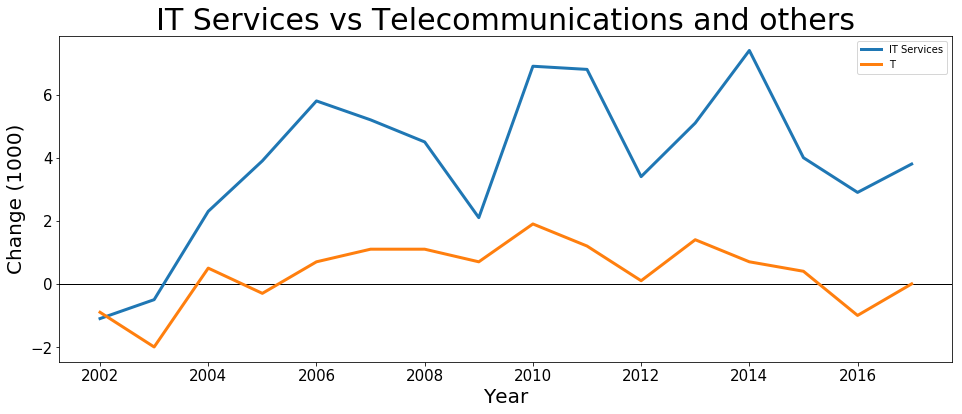

In [23]:
#From the graph below, we can certainly see that there is slow but steady growth for IT services Jobs whlist the broadcasting,
#telecommunications and publishing sector has only begun to recover. 

fig = plt.figure(figsize=DIMS)
ax = fig.add_subplot(111)
ax.axhline(y=0, color="black", linewidth=1)
it_df.plot(x='year', y='it and other information services', ax=ax, linewidth=3, fontsize=15, label='IT Services')
it_df.plot(x='year', y='telecommunications, broadcasting and publishing', ax=ax, linewidth=3, fontsize=15, label='Telecommunications')

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Change (1000)', fontsize=20)
ax.set_title('IT Services vs Telecommunications and others', fontsize=30)
# ax.legend()

plt.show()

## Conclusion

From the above analysis, we can clearly see that over the years, the service sector has been growing and there has been an increase in the number of jobs in the services sector whilst the construction and manufacturing sectors have been shrinking. Within the service sector, the community, social and personal industry has fared the best, with them holding a majority of the jobs within the services sector. This is most likely due to the aging population, hence, more nurses and social staff are need to take care to the elderly. It is also worthy to mention that the Infocomm sector has been growing slowly but steadily, due to the increase in IT services jobs and the decrease in broadcasting, telecommunication and publishing jobs, due to the changing market trend of people seeking online foreign entertainment like YouTube or Netflix.

This analysis provides an overview of the job markets for the different sector and a more detailed analysis for each individual sector can be done to find out which area has a greater demand for employees. It is also possible to further subdivde the categories in the service sector so as to have a more detailed breakdown of the employment demand for each category.